## Problem Statement:
In this problem we have taken the heart disease dataset which will predict rather a person has Hear desease or not. The dataset shape is (918, 12).

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
'''Reading Dataset'''
f = pd.read_csv('heart.csv')

In [3]:
f.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
f.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
f.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
f.duplicated().sum()

0

In [8]:
f.shape

(918, 12)

## Data Plotting

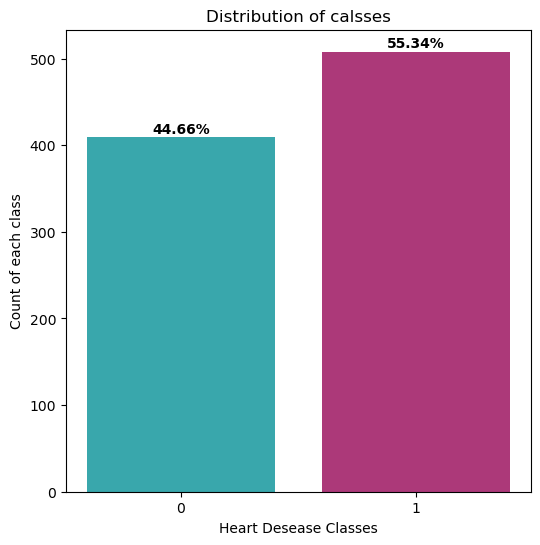

In [9]:
'''Target Variable Ploting and checking if we have unbalance dataset problem'''


bar = f['HeartDisease'].value_counts().rename_axis('Subclass').reset_index(name = 'counts')
total = bar['counts'].sum()
percentage= []
for i in range(bar.shape[0]):
    pct = (bar.counts[i]/total)*100
    percentage.append(round(pct,2))
bar['Percentage'] = percentage


plt.figure(num = 1, figsize= (6,6))
c_list = ['#AC3979','#39A7AC','#39AC79']
graph = plt.bar(bar.Subclass, bar.counts, color = c_list)
plt.xlabel("Heart Desease Classes")
plt.ylabel('Count of each class')
plt.xticks([0,1])
       
plt.title("Distribution of calsses")

i = 0 
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(bar.Percentage[i])+ '%', ha = 'center', weight = 'bold')
    i = i+1
plt.show()


## One hot encoding

In [10]:
f.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [11]:
'''One hot encoding, changing the Object variables to integers.'''
# get all categorical columns in the dataframe
catCols = [col for col in f.columns if f[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

for item in catCols:
    f[item] = lb_make.fit_transform(f[item])

## Anamoly Detection using Z-score

In [12]:
from scipy import stats
z_scores = stats.zscore(f)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_f = f[filtered_entries]

new_f.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [13]:
f.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
new_f.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [15]:
new_f.duplicated().sum()

0

## For scaling: Standard Scaling

In [74]:
def Standard_Scaler(X):
    new = X - np.mean(X, axis=0)
    scale = new / np.std(new, axis=0)
    return scale

## Logistic Regression Model Started

In [75]:
X = new_f.drop('HeartDisease', axis =1)
y = new_f['HeartDisease']
X = scale(X)

# l1 l2 regularization
import random
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

## Preparing Dataset for modeling

In [81]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values
X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])

In [82]:
'''Activation Function'''

def sigmoid(x):
    sig = 1/(1+np.exp(-x))
    return sig

In [83]:
def model(X, Y, learning_rate, iterations):
    
    m = X_train.shape[1] ## number of samples
    n = X_train.shape[0] ## columns size
    
    W = np.ones((n,2)) # initializing weights
    B = 0 ## bias initial
    
    cost_list = []
    
    for i in range(iterations):
        
        Z = np.dot(W.T, X) + B # linear calculation
        A = sigmoid(Z) # sigmoid transformation
        
        # cost function
        cost1 = Y*np.log(A)
        cost2 = (1-Y)*np.log(1-A)
        cost = -1/m*(np.sum(cost1 +cost2))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T) ## changing weights
        dB = (1/m)*np.sum(A - Y) # chanding bias
        
        W = W - learning_rate*dW.T ## changed
        B = B - learning_rate*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
        
    return W, B, cost_list

In [84]:
iteration = 1000 
lr = 0.03
W, B, cost_list = model(X_train, y_train, lr, iteration)

cost after  0 iteration is :  2.599917511974016
cost after  100 iteration is :  1.4740107120327617
cost after  200 iteration is :  1.1110437801858468
cost after  300 iteration is :  0.9536059294822736
cost after  400 iteration is :  0.8670929109727974
cost after  500 iteration is :  0.8147959860178069
cost after  600 iteration is :  0.7823672810285034
cost after  700 iteration is :  0.7622053955176417
cost after  800 iteration is :  0.7497005089747357
cost after  900 iteration is :  0.7419498942647618


### Ploting the cost overtime

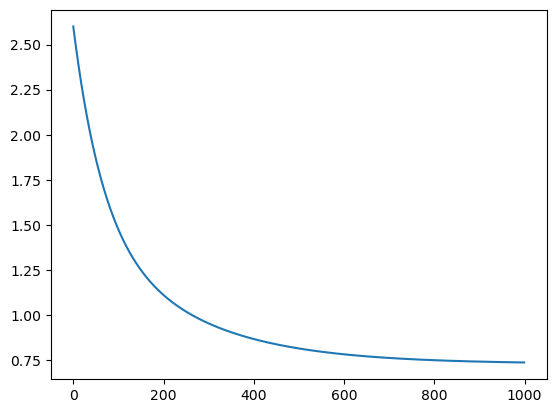

In [85]:
plt.plot(np.arange(iteration), cost_list)
plt.show()

In [86]:
def accuracy(X, Y, W, B):
    ## Calculating
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")

In [87]:
accuracy(X_test, y_test, W, B)

Accuracy of the model is :  73.33 %


## The end